# Stock Market Prediction and Forecasting Using Stacked LSTM

In [1]:
# Kearas and Tensorflow > 2.0

In [2]:
# Data Collection

import pandas_datareader as pdr

key =  "signup_and_get_key_form_tingo"

In [3]:
df = pdr.get_data_tiingo('TSLA', api_key = key)

In [4]:
df.to_csv('TSLA.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('TSLA.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-05-02 00:00:00+00:00,241.80,243.19,234.82,241.50,3843935,48.360,48.638,46.964,48.300,19219675,0.0,1.0
1,TSLA,2016-05-03 00:00:00+00:00,232.32,238.91,231.62,237.36,4302222,46.464,47.782,46.324,47.472,21511110,0.0,1.0
2,TSLA,2016-05-04 00:00:00+00:00,222.56,234.46,220.40,230.29,8700459,44.512,46.892,44.080,46.058,43502295,0.0,1.0
3,TSLA,2016-05-05 00:00:00+00:00,211.53,228.64,209.79,228.46,11254827,42.306,45.728,41.958,45.692,56274135,0.0,1.0
4,TSLA,2016-05-06 00:00:00+00:00,214.93,216.37,208.11,210.87,5685237,42.986,43.274,41.622,42.174,28426185,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2021-04-23 00:00:00+00:00,729.40,737.36,715.4600,719.80,28413889,729.40,737.36,715.4600,719.80,28413889,0.0,1.0
1254,TSLA,2021-04-26 00:00:00+00:00,738.20,749.30,732.6053,741.00,31038502,738.20,749.30,732.6053,741.00,31038502,0.0,1.0
1255,TSLA,2021-04-27 00:00:00+00:00,704.74,724.00,703.3501,717.96,29436995,704.74,724.00,703.3501,717.96,29436995,0.0,1.0
1256,TSLA,2021-04-28 00:00:00+00:00,694.40,708.50,693.6000,696.41,22271047,694.40,708.50,693.6000,696.41,22271047,0.0,1.0
1257,TSLA,2021-04-29 00:00:00+00:00,677.00,702.25,668.5002,699.51,28845449,677.00,702.25,668.5002,699.51,28845449,0.0,1.0


In [10]:
df1 = df.reset_index()['close']

In [11]:
df1

0       241.80
1       232.32
2       222.56
3       211.53
4       214.93
         ...  
1253    729.40
1254    738.20
1255    704.74
1256    694.40
1257    677.00
Name: close, Length: 1258, dtype: float64

In [12]:
# Plotting the stock graphs

import matplotlib.pyplot as plt

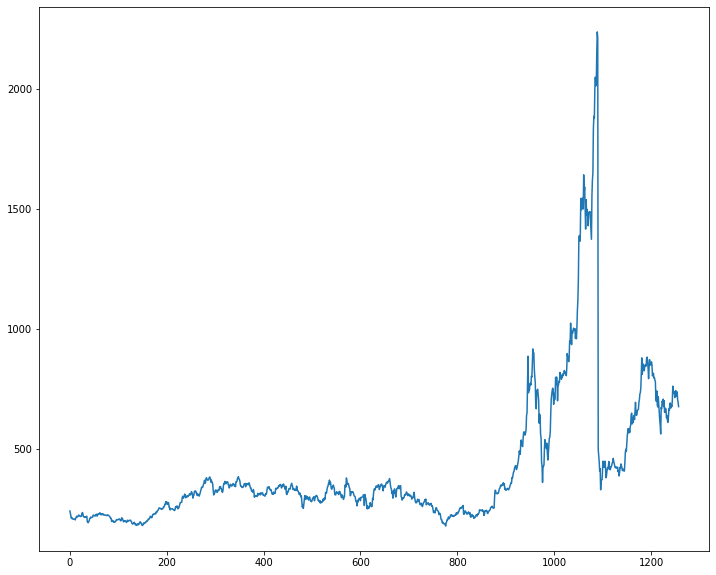

In [14]:
plt.figure(figsize = (12,10))
plt.plot(df1);

In [15]:
# Since LSTM are senstive to the scale of the data, so we apply MinMax scaler

In [16]:
import numpy as np

In [17]:
df1

0       241.80
1       232.32
2       222.56
3       211.53
4       214.93
         ...  
1253    729.40
1254    738.20
1255    704.74
1256    694.40
1257    677.00
Name: close, Length: 1258, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.03050326]
 [0.02590082]
 [0.02116245]
 ...
 [0.25525542]
 [0.25023546]
 [0.24178796]]


In [22]:
# Splitting the dataset into train and test split

train_size = int(len(df1) * 0.65)
test_size = len(df1) - train_size

train_data, test_data = df1[0:train_size,:], df1[train_size: len(df1),:1]

In [23]:
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [25]:
import numpy 


# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i: (i+ time_step), 0]  ## i = 0,  0,1,2,3----99     100
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X = t, t+1, t+2, t+3 and y = t + 4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((716, 100), (716,), (340, 100), (340,))

In [29]:
X_train

array([[0.03050326, 0.02590082, 0.02116245, ..., 0.01328783, 0.0124625 ,
        0.01274408],
       [0.02590082, 0.02116245, 0.01580751, ..., 0.0124625 , 0.01274408,
        0.01333152],
       [0.02116245, 0.01580751, 0.01745818, ..., 0.01274408, 0.01333152,
        0.01382672],
       ...,
       [0.05165115, 0.04736914, 0.04722349, ..., 0.03724184, 0.03942169,
        0.04170834],
       [0.04736914, 0.04722349, 0.04739341, ..., 0.03942169, 0.04170834,
        0.02420161],
       [0.04722349, 0.04739341, 0.05105885, ..., 0.04170834, 0.02420161,
        0.02382293]])

In [30]:
# Reshape input to be [samples, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [31]:
# Create the stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer= 'adam')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 36s 116ms/step - loss: 0.0018 - val_loss: 0.0613
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 4.5922e-04 - val_loss: 0.0389
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 2.9999e-04 - val_loss: 0.0191
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 1.6017e-04 - val_loss: 0.0176
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 1.6890e-04 - val_loss: 0.0173
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 1.1613e-04 - val_loss: 0.0157
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 1.1840e-04 - val_loss: 0.0153
Epoch 8/100
12/12 [==============================] - 0s 17ms/step - loss: 1.0445e-04 - val_loss: 0.0152
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 1.0336e-04 - val_loss: 0.0145
Epoch 10/100
12/12 [==============================] - 0s 18ms/step

In [36]:
# Let's do the prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [37]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
# Calculate RMSE performance metrics

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

297.0669274543466

In [40]:
# Test data RMSE

math.sqrt(mean_squared_error(y_test, test_predict))

699.7328657135802

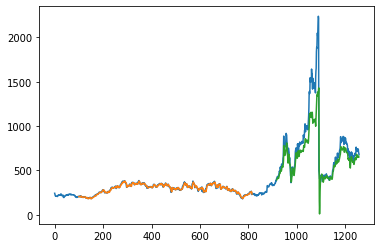

In [41]:
# Plotting
# Shift train predictionis for plotting

look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(train_predict) + look_back, :] = train_predict


# Shif test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1: len(df1)-1,:] = test_predict


# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

441

In [43]:
X_input = test_data[341:].reshape(1,-1)
X_input.shape

(1, 100)

In [44]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [46]:
# Demonstrate prediction for next 10 days

from numpy import array

lst_output = []
n_steps = 100
i = 0

while(i<30):
  if(len(temp_input) > 100):
    # print(temp_input)
    X_input = np.array(temp_input[1:])
    print(" {} day input {}".format(i, X_input))
    X_input = X_input.reshape(1,-1)
    X_input = X_input.reshape((1, n_steps, 1))

    # print(X_input)
    yhat = model.predict(X_input, verbose = 0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    # print(temp_input)
    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    X_input = X_input.reshape((1, n_steps, 1))
    yhat = model.predict(X_input, verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i = i+1

print(lst_output)

[0.21283275]
101
 1 day input [0.22467933 0.2286215  0.20658031 0.21754751 0.20925536 0.22374234
 0.22054783 0.2154599  0.23154415 0.25052676 0.22861179 0.22398994
 0.2267281  0.23439396 0.2353261  0.23644273 0.25041995 0.25570692
 0.2674072  0.26999971 0.28013186 0.30929031 0.34035188 0.30693569
 0.32550564 0.32791852 0.32335007 0.31420346 0.3231316  0.32599598
 0.32334521 0.32414627 0.34073056 0.34184233 0.33265203 0.31870394
 0.29836196 0.32083038 0.3368418  0.32805445 0.32577266 0.32686015
 0.33229277 0.32551535 0.30384313 0.30716387 0.30932915 0.29966793
 0.30060492 0.29537621 0.29242443 0.25999379 0.25239103 0.27335444
 0.24432221 0.24105972 0.26190176 0.24637097 0.23023333 0.2148142
 0.20341007 0.18644224 0.24012759 0.23744769 0.25276    0.24991018
 0.25680898 0.2417297  0.25383293 0.23021391 0.23104409 0.23838954
 0.23458331 0.21910107 0.22401422 0.21348882 0.20988649 0.22169843
 0.23738458 0.23438425 0.24860907 0.2488858  0.23886046 0.24508928
 0.24179767 0.25391547 0.28320986

In [47]:
day_new = np.arange(1,101)
day_pred = np.arange(101, 131)

In [48]:
import matplotlib.pyplot as plt

In [49]:
len(df1)

1258

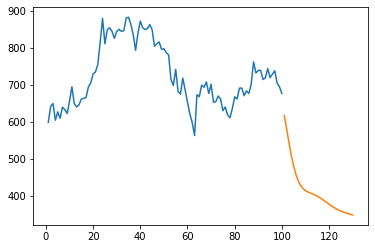

In [50]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

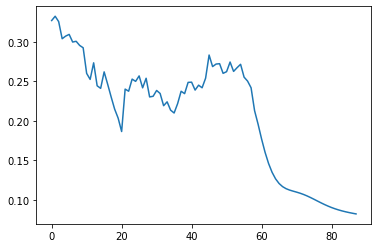

In [51]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()

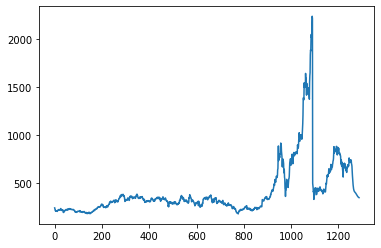

In [53]:
plt.plot(df3)
